# Práctica 6 - DLT y RANSAC

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline
from functools import reduce

# DLT

In [2]:
def printVars(results):
    for key in results.keys():
        print(key)
        print(results[key])
        print(" ")

In [3]:
def aplicarHsobrePunto(Hparam, x,y):
    vect = np.array([x,y,1])
    vect = Hparam @ vect
    vect = vect/vect[2]
    x_pr = int(vect[0])
    y_pr = int(vect[1])
    return (x_pr,y_pr)

In [4]:
def aplicarH(H, img):
    img_transf = np.zeros(img.shape)
    vect_ant = np.array([-1,-1,-1])

    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            vect = np.array([x,y,1])
            vect = H @ vect
            vect = vect/vect[2]
            x_pr = int(vect[0])
            y_pr = int(vect[1])
            
            #print(y_pr)
            #print(x_pr)
            #print(img.shape[0])
            #print(img.shape[1])
            #print(" ")
            
            if (y_pr < img.shape[0] and  y_pr>= 0) and (x_pr< img.shape[1] and  x_pr>= 0):
                img_transf[y, x, :] = img[y_pr,x_pr,:].astype(np.uint8)
                #print("no se fue")

    return img_transf

Para obtener el H:
* Generar una matriz A, de dimensión 2n × 9, con las matrices Ai
* Descomponer A según SVD. A = UD(V^t)


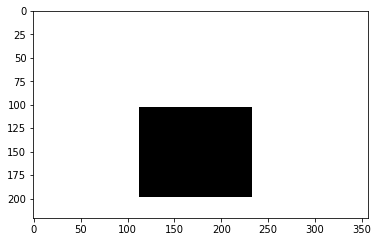

In [5]:
#d1 = imread("img/dameros/damero1.jpg");
#d2 = imread("img/dameros/damero2.jpg");

d1 = imread("img/cuadrado1.png");
#d2 = imread("img/cuadrado2.png");
plt.imshow(d1);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


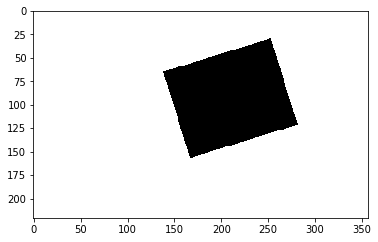

In [6]:
alpha = 0.3

Hobjetivo = [[ math.cos(alpha) , -math.sin(alpha)   ,0.        ],
 [math.sin(alpha)   ,math.cos(alpha)  ,0.        ],
 [ 0.          ,0.          ,1.        ]]

d2 = aplicarH(Hobjetivo, d1)
plt.imshow(d2);

In [7]:
#u,d,vt = np.linalg.svd(d1, full_matrices=True)
"Con esta descomposición tenemos que la última columna de la matriz V corresponde al vector de menor valor singular de la matriz A."
"O sea que la última fila de V corresponde al vector de menor valor singular de A"


'O sea que la última fila de V corresponde al vector de menor valor singular de A'

1. tengo mis correspondencias en el espacio pixel R2
2. buscar promedio y desvio estandard de ambos conjuntos de puntos de correspondencias.
3. los normalizo. o sea, les resto el promedio y divido por sqrt(2)/desvio. Esto es equivalente a armar la H que transforma al espacio normal. esta H es de 3x3, que escala y traslada.
H = [[s 0 -Mediax.s] [0 s -Mediay.s] [0 0 1]]
obs: va a haber una H por conjunto de puntos. A la primera H la llamamos H moño, a la segunda H moño prima
4. Paso todos los puntos a P2
5. Armo las Ai, con eso armo la A, y con eso obtengo V. con V obtengo la H con puntito arriba, y con eso obtengo la H final

### Dados 4 puntos de correspondencia:

Tenemos nuestras correspondencias en la primer imagen, y en la segunda

In [8]:
def invertirCoordenadas(conjuntoPuntos):
    return [(p[1],p[0]) for p in conjuntoPuntos]

In [9]:
#puntosDamero = [(867,779), (2055,800), (845,3110), (1997, 3137)]
#puntosOtroDamero = [(566,740),(1779,379), (1206, 3210), (2501, 2887)]

puntosCuadrado = [(113,103), (232,103), (113,199), (232,199)]
#puntosOtroCuadrado = [(74,29), (333,29), (74,203), (333,203)]

###### Redefinicion de puntos intercambiando coordenadas
puntosCuadrado = invertirCoordenadas(puntosCuadrado)
#puntosOtroCuadrado = [(p[1],p[0]) for p in puntosOtroCuadrado]


In [10]:
puntosOtroCuadrado = [aplicarHsobrePunto(Hobjetivo,p[0],p[1]) for p in puntosCuadrado]
print(puntosOtroCuadrado)

[(65, 138), (29, 252), (156, 166), (121, 280)]


In [11]:
puntos = puntosCuadrado
puntosX = [p[0] for p in puntos]
puntosY = [p[1] for p in puntos]

otrosPuntos = puntosOtroCuadrado
otrosPuntosX = [p[0] for p in otrosPuntos]
otrosPuntosY = [p[1] for p in otrosPuntos]

In [12]:
def marcar(pl, x, y):
    pl.plot(y,x,'bo', markersize=10)


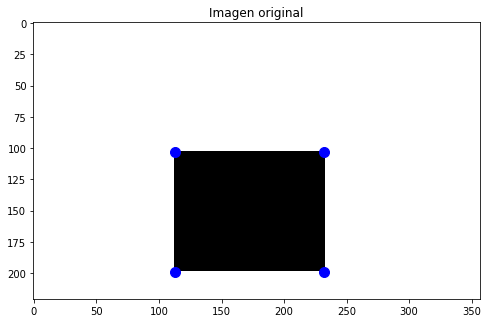

In [13]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Imagen original")
plt.imshow(d1)

for elem in puntos:
    marcar(plt, elem[0], elem[1])

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


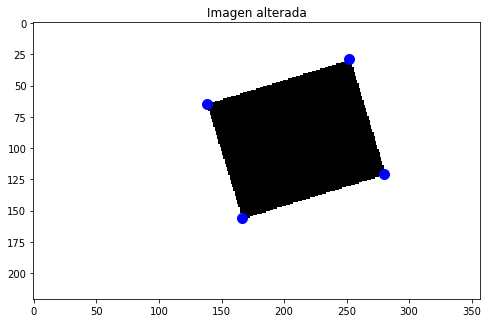

In [14]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Imagen alterada")
plt.imshow(d2)

for elem in otrosPuntos:
    marcar(plt, elem[0], elem[1])

plt.show()

Buscamos el promedio y el desvío standard de ambos conjuntos de puntos de correspondencias

In [15]:
promedioPuntosX = np.mean(puntosX)
promedioPuntosY = np.mean(puntosY)

promedioOtrosPuntosX= np.mean(otrosPuntosX)
promedioOtrosPuntosY = np.mean(otrosPuntosY)

desvioPuntosX = np.std(puntosX)
desvioPuntosY = np.std(puntosY)

desvioOtrosPuntosX = np.std(otrosPuntosX)
desvioOtrosPuntosY = np.std(otrosPuntosY)

Los normalizamos. O sea, les restamos el promedio y multiplicamos por sqrt(2)/desvio. Esto es equivalente a armar la H que transforma al espacio normal. esta H es de 3x3, que escala y traslada. H = [[s 0 -Mediax.s] [0 s -Mediay.s] [0 0 1]] obs: va a haber una H por conjunto de puntos. A la primera H la llamamos H moño, a la segunda H moño prima.

## No se usa esto:

In [16]:
def normalizar(puntosParam):
    return [(pParam-np.mean(puntosParam))*np.sqrt(2)/np.std(puntosParam) for pParam in puntosParam]

In [17]:
otrosPuntosNormalizadosX = normalizar(otrosPuntosX)
otrosPuntosNormalizadosY = normalizar(otrosPuntosY)

puntosNormalizadosX = normalizar(puntosX)
puntosNormalizadosY = normalizar(puntosY)

In [18]:
printVars({"puntosX": puntosX, "puntosY": puntosY, "puntos": puntos, \
           "otrosPuntos": otrosPuntos, \
           "otrosPuntosNormalizados":list(zip(otrosPuntosNormalizadosX,otrosPuntosNormalizadosY)), \
            "puntosNormalizados":list(zip(puntosNormalizadosX,puntosNormalizadosY))})

puntosY
[113, 232, 113, 232]
 
otrosPuntosNormalizados
[(-0.7997105702595723, -1.7107192148978188), (-1.8371729316773957, 1.03606938367051), (1.8227637322132595, -1.03606938367051), (0.8141197697237087, 1.7107192148978188)]
 
puntos
[(103, 113), (103, 232), (199, 113), (199, 232)]
 
otrosPuntos
[(65, 138), (29, 252), (156, 166), (121, 280)]
 
puntosNormalizados
[(-1.4142135623730951, -1.4142135623730951), (-1.4142135623730951, 1.4142135623730951), (1.4142135623730951, -1.4142135623730951), (1.4142135623730951, 1.4142135623730951)]
 
puntosX
[103, 103, 199, 199]
 


## fin de "no se usa esto"

In [19]:
puntosPromedio = np.mean(puntos, axis=0)
otrosPuntosPromedio = np.mean(otrosPuntos, axis=0)
puntosCentrados = puntos - np.tile(puntosPromedio, (len(puntos),1))
otrosPuntosCentrados = otrosPuntos - np.tile(otrosPuntosPromedio, (len(puntos),1))
normaPuntos = np.linalg.norm(puntosCentrados, axis=1)
normaOtrosPuntos = np.linalg.norm(otrosPuntosCentrados, axis=1)
dPuntos = np.mean(normaPuntos)
dOtrosPuntos = np.mean(normaPuntos)

sPuntos = np.sqrt(2)/dPuntos
sOtrosPuntos = np.sqrt(2)/dOtrosPuntos

Hnorm = np.array([[sPuntos,0      ,-np.mean(puntosX)*sPuntos],
                  [0      ,sPuntos,-np.mean(puntosY)*sPuntos],
                  [0      ,0      ,1]])

HnormPrima = np.array([[sOtrosPuntos,0      ,-np.mean(otrosPuntosX)*sOtrosPuntos],
                      [0      ,sOtrosPuntos,-np.mean(otrosPuntosY)*sOtrosPuntos],
                      [0      ,0      ,1]])


In [20]:
printVars({"o_centered": otrosPuntosCentrados, "Hnorm":Hnorm, "HnormPrima":HnormPrima})

o_centered
[[-27.75 -71.  ]
 [-63.75  43.  ]
 [ 63.25 -43.  ]
 [ 28.25  71.  ]]
 
HnormPrima
[[ 0.0184991   0.         -1.71579154]
 [ 0.          0.0184991  -3.86631194]
 [ 0.          0.          1.        ]]
 
Hnorm
[[ 0.0184991   0.         -2.79336413]
 [ 0.          0.0184991  -3.19109479]
 [ 0.          0.          1.        ]]
 


## hasta acá anda bien

Pasamos los puntos a P2

In [21]:
puntosP2 = [(p[1],p[0],1)for p in zip(puntosX, puntosY)]
otrosPuntosP2 = [(p[1],p[0],1)for p in zip(otrosPuntosX, otrosPuntosY)]

print(puntosP2)

[(113, 103, 1), (232, 103, 1), (113, 199, 1), (232, 199, 1)]


Armamos las Ai, con eso armamos la A, y con eso obtenemos V. Con V obtenemos la H con puntito arriba, y con eso obtenemos la H final

In [22]:
def sumarMatriz(m1,m2): # a m1 le suma m2
    for i in range(len(m1)):
        for j in range(len(m1[0])):
            m1[i][j] = m1[i][j] + m2[i][j]        

In [23]:
A = []
for (x, xPrima) in zip(puntosP2, otrosPuntosP2):
    A.append([0,0,0,  -xPrima[2]*x[0], -xPrima[2]*x[1], -xPrima[2]*x[2],    xPrima[1]*x[0], xPrima[1]*x[1], xPrima[1]*x[2]])
    A.append([xPrima[2]*x[0], xPrima[2]*x[1], xPrima[2]*x[2],   0,0,0,  -xPrima[0]*x[0], -xPrima[0]*x[1], -xPrima[0]*x[2]])
    #sumarMatriz(A,Ai)
    #A = A + Ai
    printVars({"A": A})

A
[[0, 0, 0, -113, -103, -1, 7345, 6695, 65], [113, 103, 1, 0, 0, 0, -15594, -14214, -138]]
 
A
[[0, 0, 0, -113, -103, -1, 7345, 6695, 65], [113, 103, 1, 0, 0, 0, -15594, -14214, -138], [0, 0, 0, -232, -103, -1, 6728, 2987, 29], [232, 103, 1, 0, 0, 0, -58464, -25956, -252]]
 
A
[[0, 0, 0, -113, -103, -1, 7345, 6695, 65], [113, 103, 1, 0, 0, 0, -15594, -14214, -138], [0, 0, 0, -232, -103, -1, 6728, 2987, 29], [232, 103, 1, 0, 0, 0, -58464, -25956, -252], [0, 0, 0, -113, -199, -1, 17628, 31044, 156], [113, 199, 1, 0, 0, 0, -18758, -33034, -166]]
 
A
[[0, 0, 0, -113, -103, -1, 7345, 6695, 65], [113, 103, 1, 0, 0, 0, -15594, -14214, -138], [0, 0, 0, -232, -103, -1, 6728, 2987, 29], [232, 103, 1, 0, 0, 0, -58464, -25956, -252], [0, 0, 0, -113, -199, -1, 17628, 31044, 156], [113, 199, 1, 0, 0, 0, -18758, -33034, -166], [0, 0, 0, -232, -199, -1, 28072, 24079, 121], [232, 199, 1, 0, 0, 0, -64960, -55720, -280]]
 


In [24]:
u,d,vt = np.linalg.svd(A)
"Con esta descomposición tenemos que la última columna de la matriz V corresponde al vector de menor valor singular de la matriz A. O sea que la última fila de V corresponde al vector de menor valor singular de A"
"ultima columna de la matriz V = ultima fila de la matriz Vt"
print(u.shape)
sigma = np.transpose(np.diag(d) + [0,0,0,0,0,0,0,0])
print(sigma)
print(vt.shape)
print(np.matmul(np.matmul(u,np.diag(d)),vt))
#v = [fila[-1] for fila in vt]
#Hpuntito = [v[0:3],v[3:6],v[6:9]]
fila = vt[-1]
Hpuntito = [[fila[0],fila[1],fila[2]],[fila[3],fila[4],fila[5]],[fila[6],fila[7],fila[8]]]

(8, 8)
[[1.24302731e+05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.54783338e+04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.60953382e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.58464203e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.03250237e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.49275932e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.71926523e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.6887243

ValueError: shapes (8,8) and (9,9) not aligned: 8 (dim 1) != 9 (dim 0)

Hpuntito corresponde a la H con puntito arriba descripta en las diapositivas. Para obtener la H final debemos considerar la normalización que calculamos previamente

In [ ]:
print(np.linalg.inv(HnormPrima))
print(HnormPrima)
np.matmul(np.linalg.inv(HnormPrima), HnormPrima)

In [ ]:
HnormPrimaInv = np.linalg.inv(HnormPrima)

Hfinal = np.matmul(np.matmul(HnormPrimaInv, Hpuntito), Hnorm)

In [ ]:
printVars({"Hfinal": Hfinal, "Hobjetivo": Hobjetivo, "Hpuntito": Hpuntito, "Hnorm": Hnorm, \
           "HfinalInv": np.linalg.inv(Hfinal), "HpuntitoInv":np.linalg.inv(Hpuntito), \
           "HnormInv":np.linalg.inv(Hnorm), "HobjetivoInv": np.linalg.inv(Hobjetivo)})

## Pruebas DLT

In [ ]:
imagenhomografiada = transf_dlt(Hpuntito, d1);

In [ ]:
#print(imagenhomografiada)

In [ ]:
plt.imshow(d1)

In [ ]:
plt.imshow(imagenhomografiada)

## Probando con una H

In [ ]:
Hmanual = np.array([[0.965, -0.258, 0], [0.258,0.965,0],[0,0,1]]);
girada = transf_dlt(Hmanual, d1)
plt.imshow(girada);

In [ ]:
plt.imshow(transf_dlt(np.linalg.inv(H), d1));

In [ ]:
print(np.linalg.inv(H))